In [2]:
import numpy as np
from myFunctions import *
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate, CloughTocher2DInterpolator, RectBivariateSpline
import scipy.stats as stats
from datetime import datetime, timedelta
plt.style.use('./custom_latex_style.mplstyle')


Task 1

C:\Users\astri\AppData\Local\Temp\ipykernel_18488\2927806338.py:8: RuntimeWarning: invalid value encountered in divide
  v=(gamma/(4*np.pi))*(np.cross(L,r)/(np.linalg.norm(np.cross(L,r)))**2)*(np.dot(L,(e_1-e_2)))


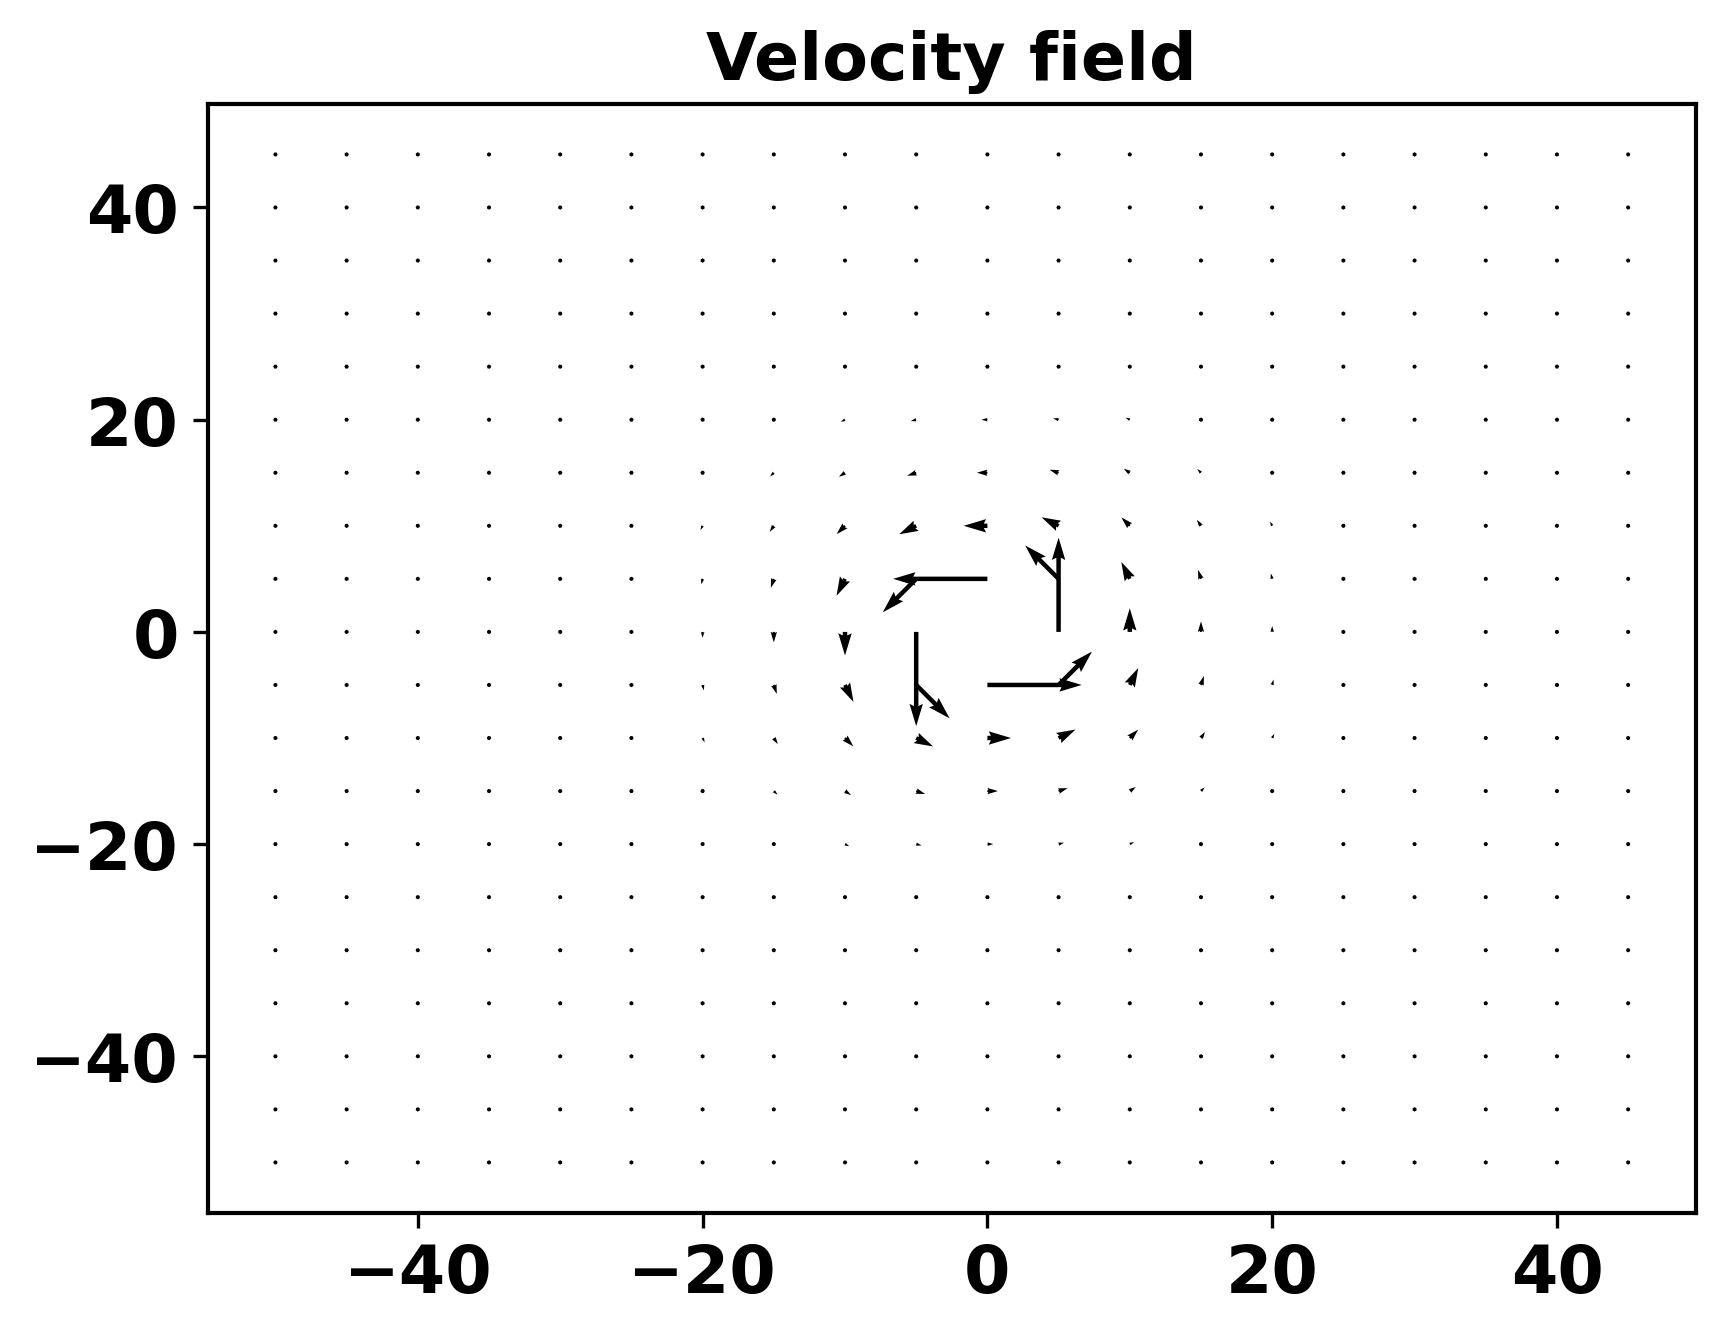

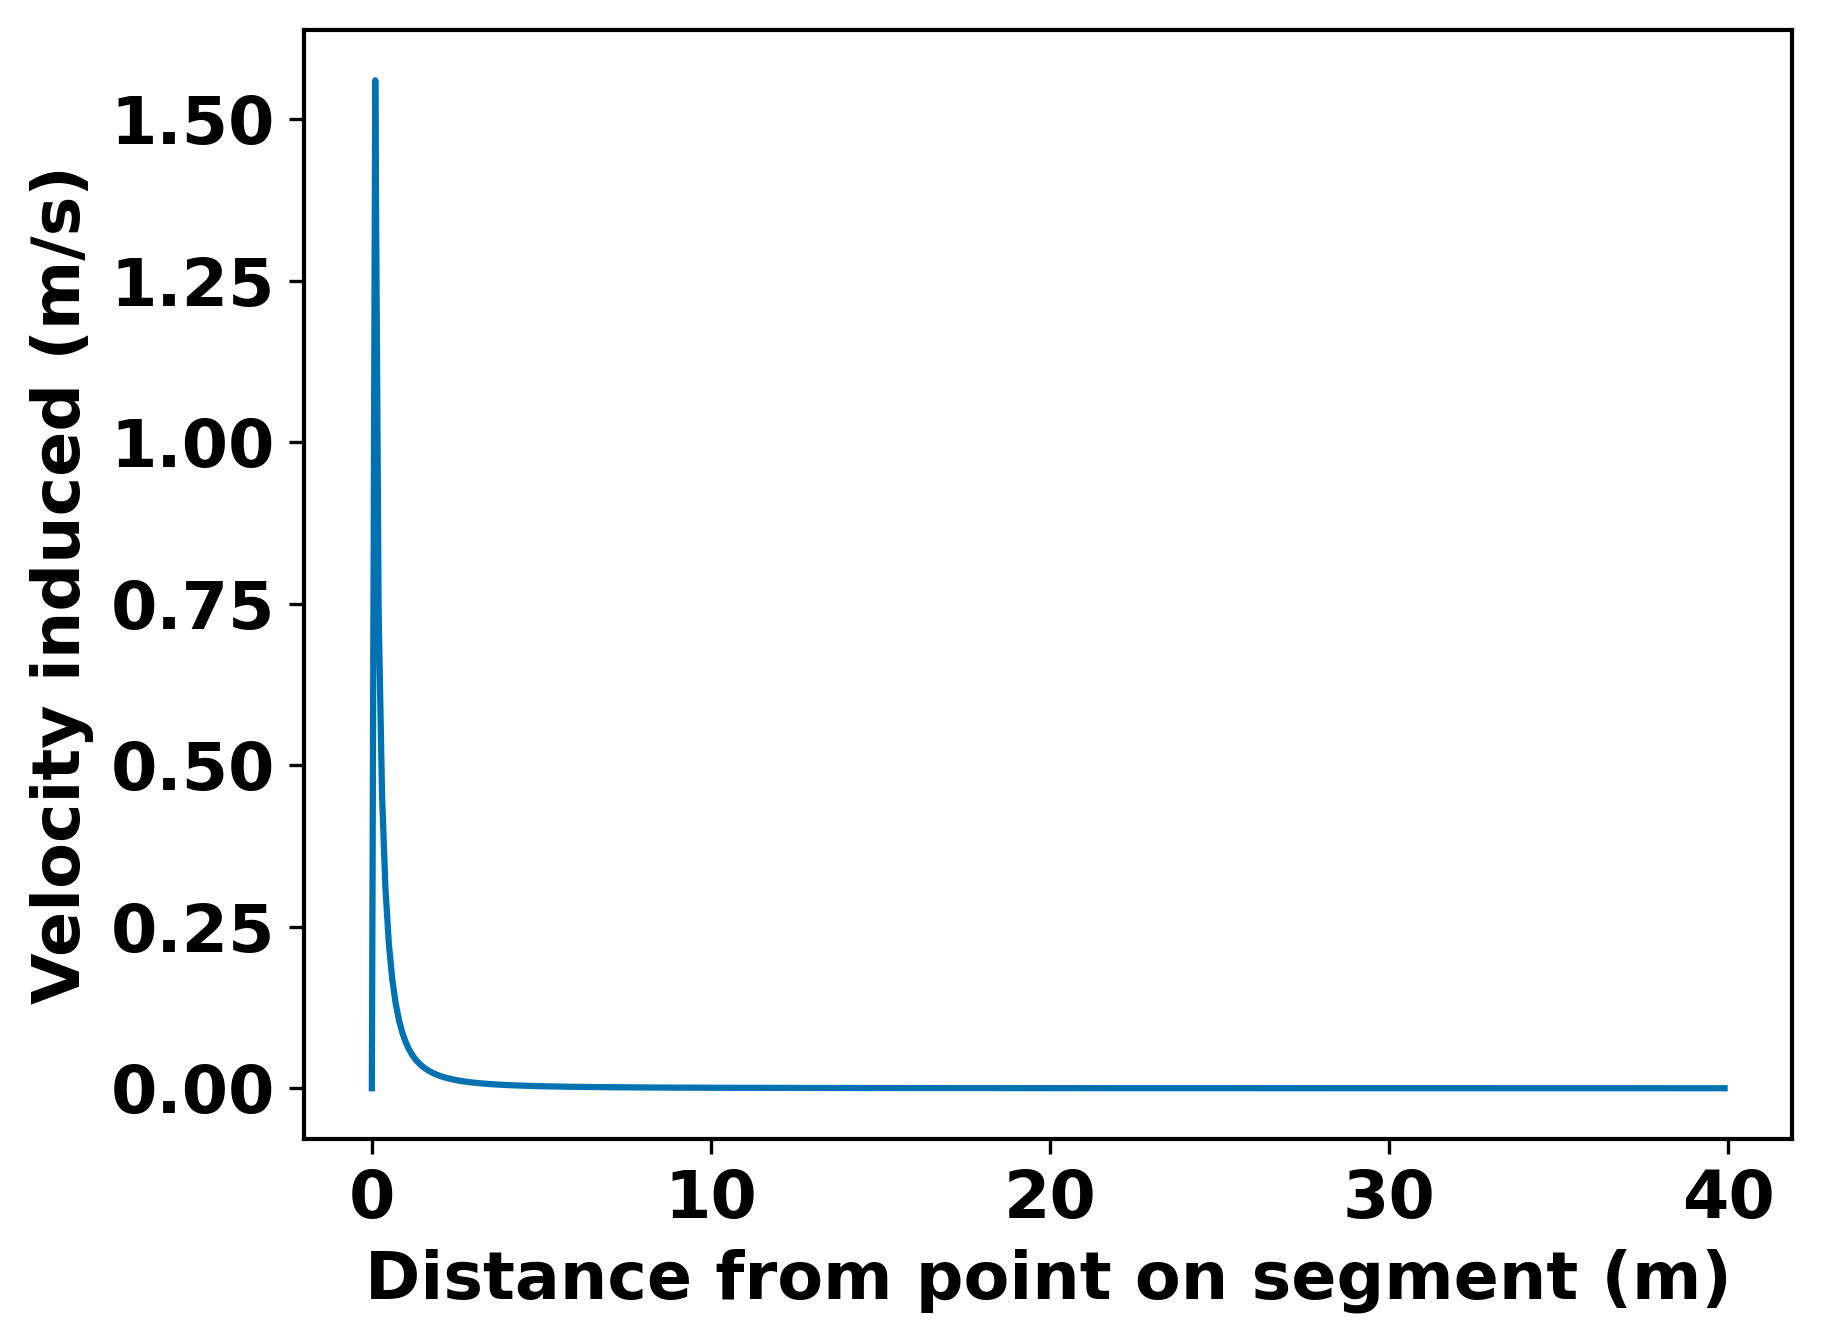

In [25]:
def biot_savart(r):
    gamma=1
    L_len=1 
    L=np.array([0,0,1])
    r_2= r-L
    e_1=r/np.linalg.norm(r)
    e_2=r_2/np.linalg.norm(r_2)
    v=(gamma/(4*np.pi))*(np.cross(L,r)/(np.linalg.norm(np.cross(L,r)))**2)*(np.dot(L,(e_1-e_2)))
    return v

xm=[]
ym=[]
vec_x=[]
vec_y=[]

for x in range(-50,50,5):
    for y in range(-50,50,5):
        r=np.array([x,y,0.5])
        biot= biot_savart(r)
        xm.append(x)
        ym.append(y)
        vec_x.append(biot[0])
        vec_y.append(biot[1])

#plot of velocity field 
plt.figure()
plt.quiver(xm,ym,vec_x,vec_y,scale=0.05)
plt.title('Velocity field')
plt.savefig('velocity_field.pdf',bbox_inches='tight')
plt.show()

def biot_savart_mod(r):
    gamma=1
    L_len=1 
    L=np.array([0,0,1])
    delta= 0.001
    r_2= r-L
    e_1=r/np.linalg.norm(r)
    e_2=r_2/np.linalg.norm(r_2)
    v_mod=(gamma/(4*np.pi))*(np.cross(L,r)/((np.linalg.norm(np.cross(L,r)))**2+(delta*L_len)**2))*(np.dot(L,(e_1-e_2)))
    return v_mod

xn=[]
velocity=[]
for x in np.arange(0,40,0.1):
    r=np.array([x,0,0.5])
    biot_mod= biot_savart_mod(r)
    xn.append(x)
    velocity.append(np.linalg.norm(biot_mod))

plt.figure()
plt.plot(xn,velocity)
plt.xlabel('Distance from point on segment (m)')
plt.ylabel('Velocity induced (m/s)')
plt.savefig('velocity_dist.pdf',bbox_inches='tight')
plt.show()

In [3]:
# Basic implementation of the lifting line theory
# Author: Dr. Bruno Roccia, Bergen Offshore Wind Centre, UiB
# Contact: bruno.roccia@uib.no
# Date: February 15, 2024

# INPUT DATA

DATA = {
    "VInf": 10.0,         # Free-stream velocity
    "Chord": 1.0,         # Chord wing dimension
    "Rho": 1.225,         # Air density
    "NHShoe": [25],     # Number of horseshoe elements
    "AE": [1000],            # Aspect ratio
    "AoA": np.arange(1,16,1)  # Angle of attack in degrees
}

FLAG_PLOT = 1           # (1: PLOT Wing / 2: Plot Force curves)
FLAG_Analysis = 2      # Analysis flag

# Lengths
N1 = len(DATA["AoA"])
N2 = len(DATA["AE"])
N3 = len(DATA["NHShoe"])


# Analysis
if FLAG_Analysis == 1:
    WING = Geometry(DATA, 0, 0)
    AMatrix = AerodynamicMatrix(DATA, WING)
    RHS = RightHandSide(DATA, WING, 0)
    GAMMA = np.linalg.solve(AMatrix, RHS)
    LOADS = AerodynamicLoads(WING, DATA, GAMMA)

elif FLAG_Analysis == 2:
    AEROLOADS = [None] * N1
    for i in range(N1):
        WING = Geometry(DATA, 0, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, i)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 3:
    AEROLOADS = [None] * N2
    for i in range(N2):
        WING = Geometry(DATA, i, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 4:
    AEROLOADS = [None] * N3
    for i in range(N3):
        WING = Geometry(DATA, 0, i)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

# Result prints
PrintScreenReport(DATA)



******************************************************************************
                                   REPORT
******************************************************************************
Basic implementation of the lifting line theory


Free-stream velocity: 10.000000
Chord wing: 1.000000
Air density: 1.225000
Number of AoAs investigated:   15
Number of AEs (Aspect-Ratio) investigated:    1
Number of different discretizations investigated:    1
-----------------------------------------------------------------------------
                            Aerodynamic Results
-----------------------------------------------------------------------------
Structure variable called AEROLOADS contains the following information:
AEROLOADS(i).LOADS: all results related to the test case "i"
AEROLOADS(i).LOADS.D: Induced drag per horseshoe
AEROLOADS(i).LOADS.L: Lift per horseshoe
AEROLOADS(i).LOADS.DSum: Total induced drag
AEROLOADS(i).LOADS.LSum: Total lift
AEROLOADS(i).LOADS.CL: Lift c

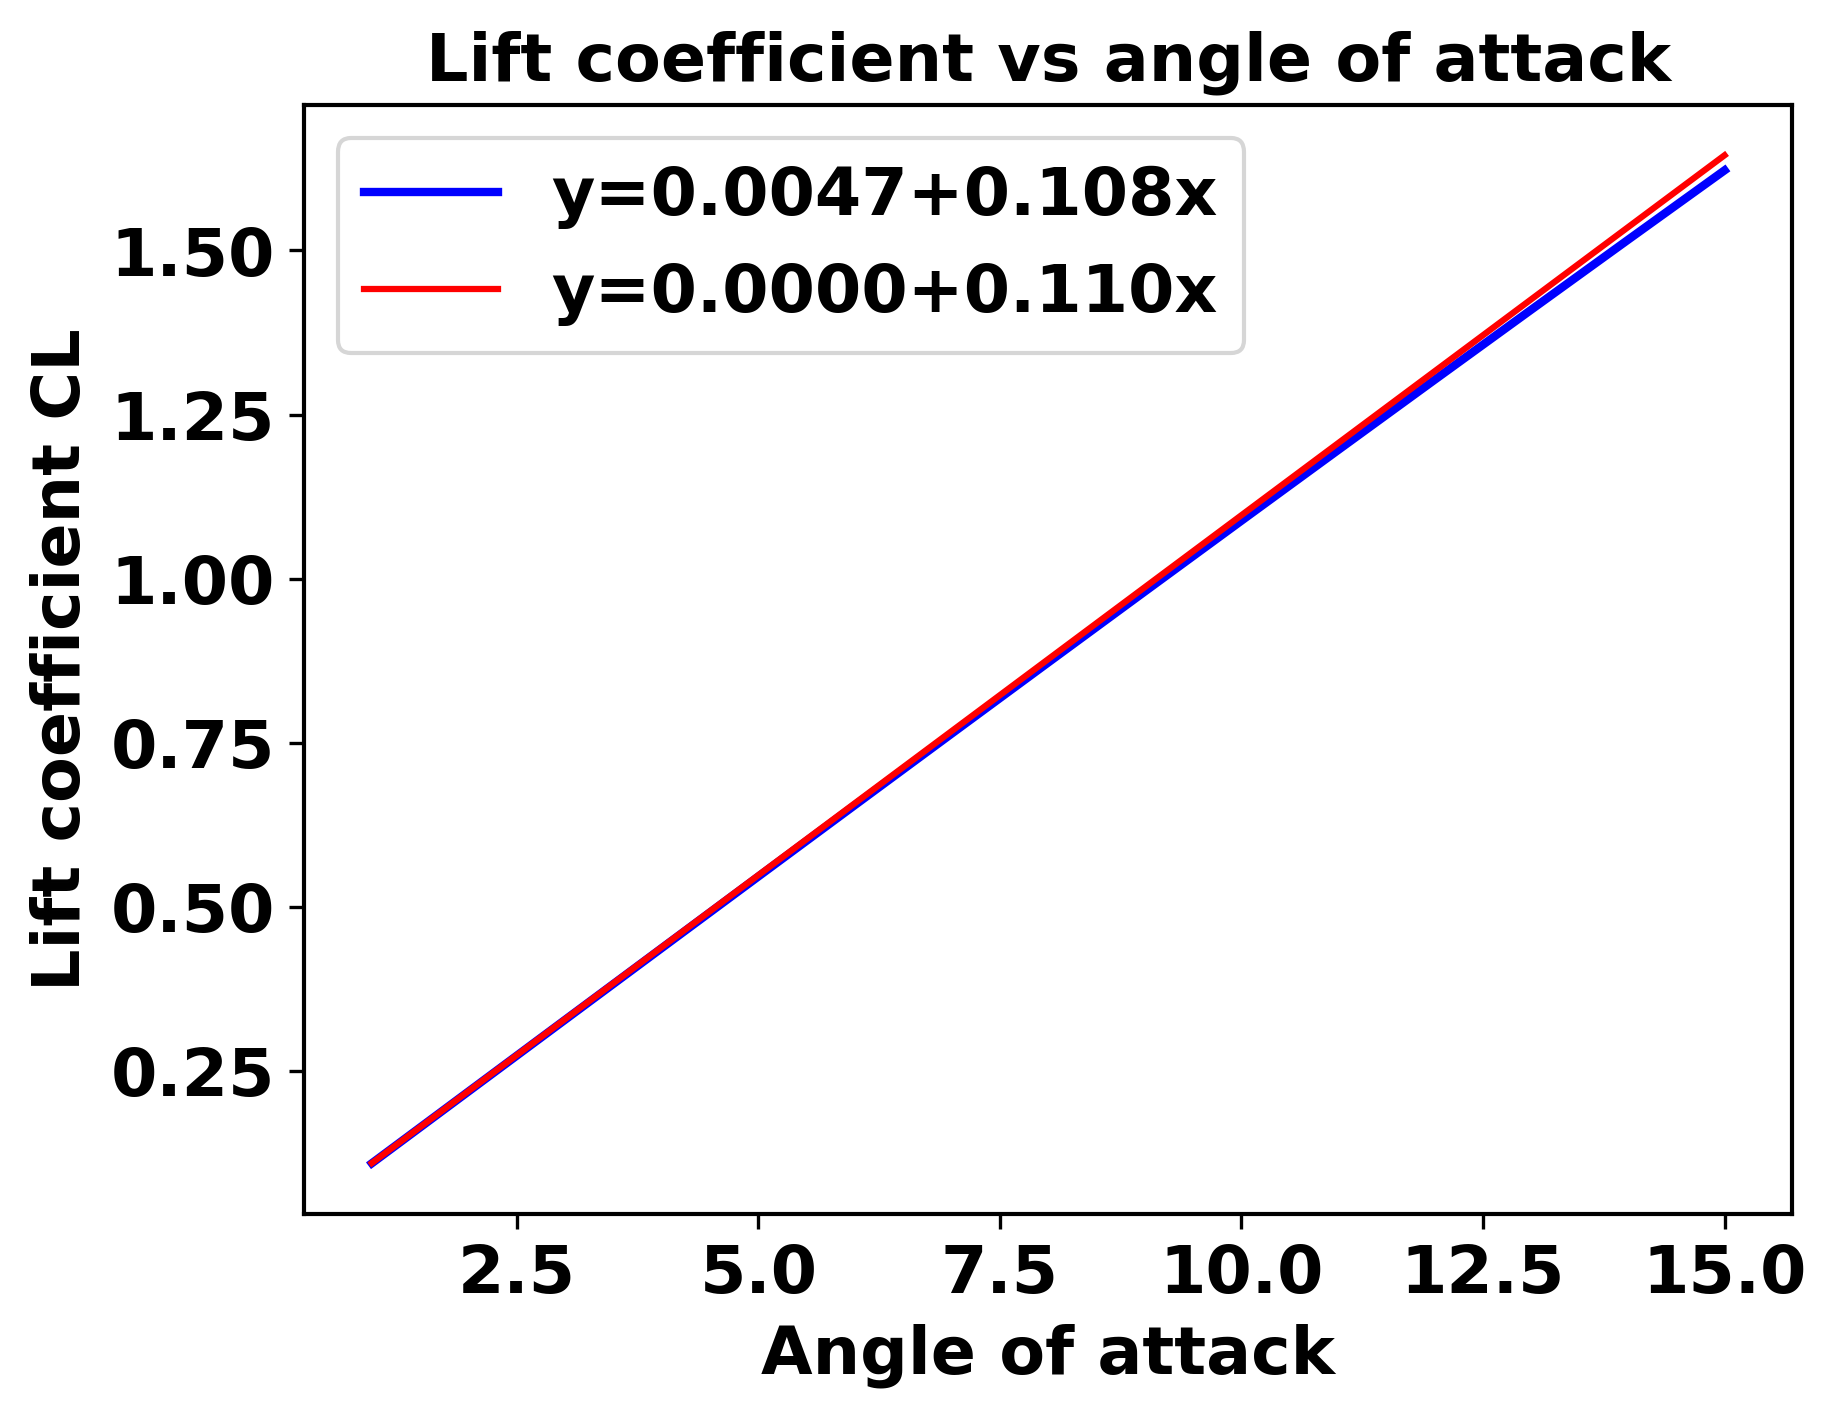

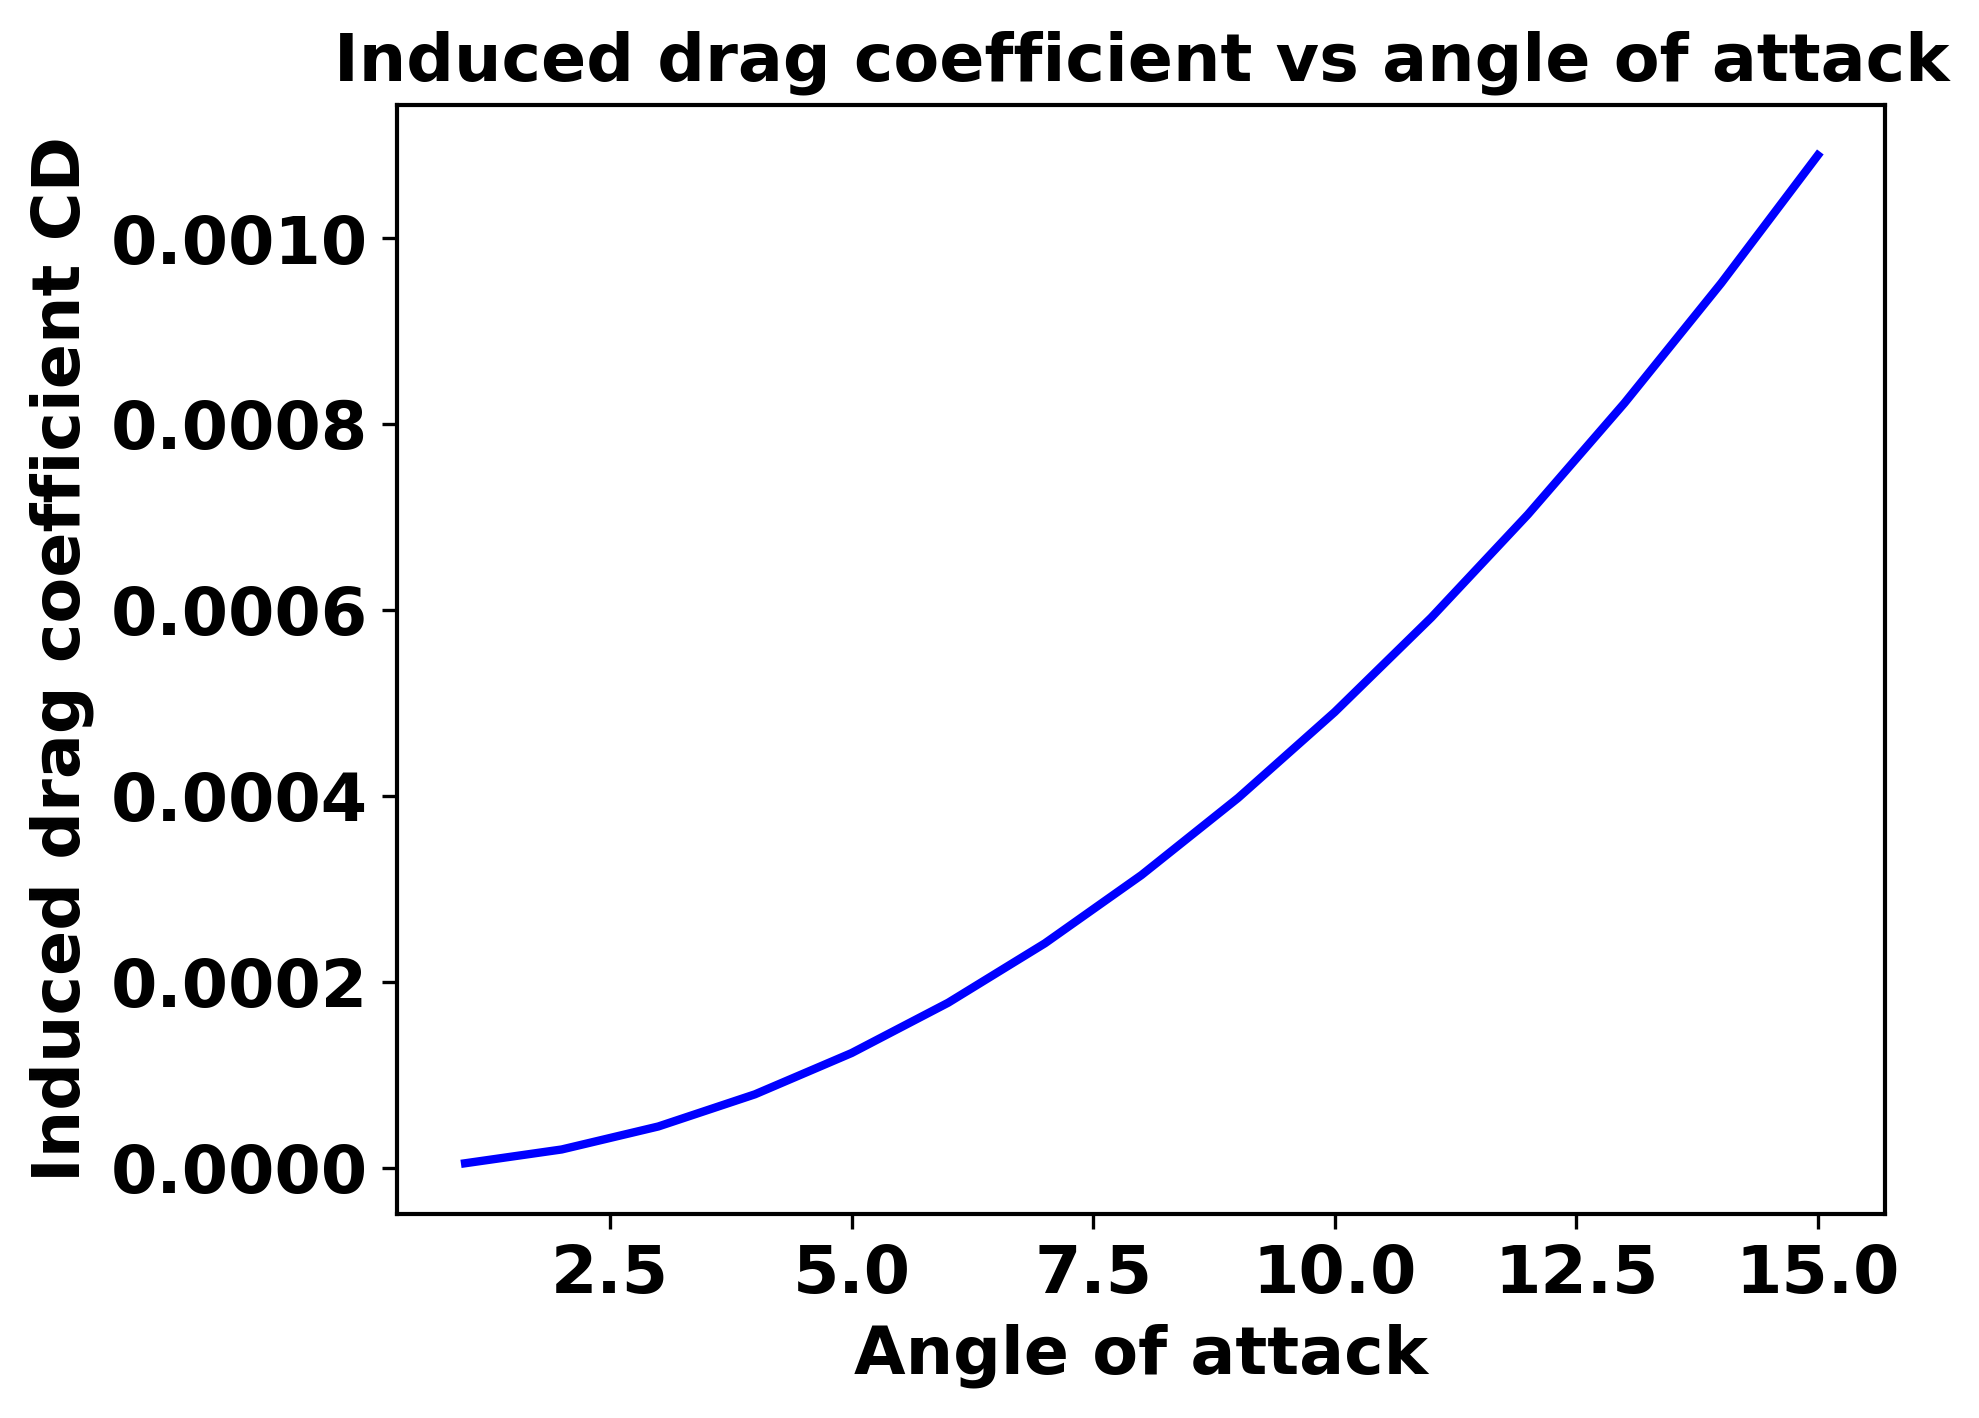

In [23]:
import math
# Assuming AEROLOADS is a list of dictionaries with a similar structure to MATLAB's struct array
L = [aeroload['LOADS']['LSum'] for aeroload in AEROLOADS]
D = [aeroload['LOADS']['DSum'] for aeroload in AEROLOADS]
CL = [aeroload['LOADS']['CL'] for aeroload in AEROLOADS]
CD = [aeroload['LOADS']['CD'] for aeroload in AEROLOADS]

#plottig konvergens horseshoe
# plt.figure(1)
# plt.plot(DATA['NHShoe'], CL, color='b', linewidth=2)
# plt.xlabel('Number of horseshoe elements')
# plt.ylabel('Lift coefficient C_L')
# plt.title('Convergence analysis')
# plt.savefig('NHSHOE_konv.pdf',bbox_inches='tight')
# plt.show()

#fitting of polyfit 
fit=np.polyfit(DATA['AoA'], CL,1)
fit2=np.polyfit(DATA['AoA'], 2*np.pi*np.radians(DATA['AoA']),1)
# print(fit)

# Plotting Lift coefficient vs AoA
plt.figure(2)
plt.plot(DATA['AoA'], CL, color='b', linewidth=2,label=f"y={fit[1]:.4f}+{fit[0]:.3f}x")
plt.plot(DATA['AoA'], 2*np.pi*np.radians(DATA['AoA']), color='r',label=f"y={fit2[1]:.4f}+{fit2[0]:.3f}x")
plt.xlabel('Angle of attack')
plt.ylabel('Lift coefficient CL')
plt.title('Lift coefficient vs angle of attack')
plt.legend()
# plt.savefig('liftcoeff_aoa_5.pdf',bbox_inches='tight')
plt.show()

# Plotting Induced Drag coefficient vs AoA
plt.figure(2)
plt.plot(DATA['AoA'], CD, color='b', linewidth=2)
plt.xlabel('Angle of attack')
plt.ylabel('Induced drag coefficient CD')
plt.title('Induced drag coefficient vs angle of attack')
# plt.savefig('Idragcoeff_Aoa.pdf',bbox_inches='tight')
plt.show()

